In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from tqdm import tqdm
from PIL import Image
import logging

from simple_3dviz import Mesh, Scene, Lines, TexturedMesh
from simple_3dviz.window import show
import numpy as np
import tripy
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
from simple_3dviz import Mesh, Scene, Lines, TexturedMesh
from simple_3dviz.behaviours.misc import LightToCamera
from simple_3dviz.behaviours.movements import CameraTrajectory
from simple_3dviz.behaviours.trajectory import Circle
from simple_3dviz.renderables.textured_mesh import Material
from simple_3dviz.window import show
import tripy
from random import sample

In [3]:
FRONT_3D_BASE = "C:/Users/Flexatroid/Desktop/diploma/3D-FRONT-base"
FRONT_3D_TEXTURE = os.path.join(FRONT_3D_BASE, "3D-FRONT-texture")
FRONT_3D_HOMES = os.path.join(FRONT_3D_BASE, "3D-FRONT")
FRONT_3D_MODELS = os.path.join(FRONT_3D_BASE, "3D-FUTURE-model")
FRONT_3D_PARSED = os.path.join(FRONT_3D_BASE, "3D-FRONT-parsed")
MODELS_INFO = "C:/Users/Flexatroid/Desktop/diploma/Python/test/config/my_models_info.json"

In [4]:
colors = {
    'black': [0, 0, 0],
    'white': [255, 255, 255],
    'red': [255, 0, 0],
    'lime': [0, 255, 0],
    'blue': [0, 0, 255],
    'yellow': [255, 255, 0],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'silver': [192, 192, 192],
    'gray': [128, 128, 128],
    'maroon': [128, 0, 0],
    'olive': [128, 128, 0],
    'green': [0, 128, 0],
    'purple': [128, 0, 128],
    'teal': [0, 128, 128],
    'navy': [0, 0, 128]
}

color_codes = {
    (255, 0, 0): 1,
    (0, 255, 0): 2,
    (0, 0, 255): 3,
    (255, 255, 0): 4,
    (255, 0, 255): 5,
    (128, 0, 128): 6
}

furniture_colors = {
    'Cabinet/Shelf/Desk': 'lime',
    'Bed': 'purple',
    'Chair': 'blue',
    'Table': 'magenta',
    'Sofa': 'yellow',
    'Pier/Stool': 'cyan',
    'Lighting': 'red',
    'Others': 'green'
}

colors_above = {
    'purple': ['magenta', 'yellow', 'lime', 'blue', 'red'],
    'magenta': ['yellow', 'lime', 'blue', 'red'],
    'yellow': ['lime', 'blue', 'red'],
    'lime': ['blue', 'red'],
    'blue': ['red'],
    'cyan': [],
    'red': []
}

connection_codes = {
    'void': 0,
    'floor': 1,
    'door': 2,
    'hole': 2,
    'window': 3
}

connection_colors = {
    'floor': 'silver',
    'hole': 'teal',
    'door': 'teal',
    'window': 'olive'
}

suitable_rooms = {
    "LivingDiningRoom",
    "MasterBedroom",
    "SecondBedroom",
    "Bedroom",
    "LivingRoom",
    "DiningRoom",
}

categories = {
    'Cabinet/Shelf/Desk': [
        'Children Cabinet',
        'Nightstand',
        'Bookcase / jewelry Armoire',
        'Wardrobe',
        'Coffee Table',
        'Corner/Side Table',
        'Sideboard / Side Cabinet / Console Table',
        'Wine Cabinet',
        'TV Stand',
        'Drawer Chest / Corner cabinet',
        'Shelf',
        'Round End Table',
        'Shoe Cabinet'
    ],
    'Bed': [
        'King-size Bed',
        'Bunk Bed',
        'Bed Frame',
        'Single bed',
        'Kids Bed',
        'Couch Bed'
    ],
    'Chair': [
        'Dining Chair',
        'Lounge Chair / Cafe Chair / Office Chair',
        'Dressing Chair',
        'Classic Chinese Chair',
        'Barstool',
        'Hanging Chair',
        'Folding chair',
    ],
    'Table': [
        'Dressing Table',
        'Dining Table',
        'Desk',
        'Bar',
    ],
    'Sofa': [
        'Three-Seat / Multi-seat Sofa',
        'armchair',
        'Loveseat Sofa',
        'L-shaped Sofa',
        'Lazy Sofa',
        'Chaise Longue Sofa',
        'U-shaped Sofa',
    ],
    'Pier/Stool': [
        'Footstool / Sofastool / Bed End Stool / Stool'
    ],
    'Lighting': [
        'Pendant Lamp',
        'Ceiling Lamp',
        'Floor Lamp',
        'Wall Lamp',
    ],
}

filter_categories = {
    'Bunk Bed',
    'Floor Lamp',
    'Wall Lamp',
    'L-shaped Sofa',
    'Footstool / Sofastool / Bed End Stool / Stool'
}

In [ ]:
# house = json.load(open('C:/Users/Flexatroid/Desktop/diploma/gen/edf9bdcc-bd49-4c27-960f-05511abffcbb_parsed'))
# C:/Users/Flexatroid/Desktop/diploma/scratch_2.json
# edf9bdcc-bd49-4c27-960f-05511abffcbb
# C:/Users/Flexatroid/Desktop/diploma/gen/edf9bdcc-bd49-4c27-960f-05511abffcbb_parsed

house = json.load(open('C:/Users/Flexatroid/Desktop/diploma/edf9bdcc-bd49-4c27-960f-05511abffcbb-parsed.json'))
doors = []

path = 'C:/Users/Flexatroid/Desktop/diploma/Python/test/gen/'
for house_ in tqdm(os.listdir(path)):
    house = json.load(open('C:/Users/Flexatroid/Desktop/diploma/parsed/' + house_))
#     print(house_)
    with open('C:/Users/Flexatroid/Desktop/diploma/parsed/' + house_, 'w') as outfile:
        json.dump(house, outfile, indent=None)
    for room_ in house:
        room = house[room_]
        if 'furniture' in room:
            for furniture in room['furniture']:
                if furniture['category'] is None:
                    print('None here!')

# xxx =[]
# yyy =[]
# for door in doors:
#     xs = np.array(door)[0::2]
#     ys = np.array(door)[1::2]
#     xrange = abs(min(xs) - max(xs))
#     yrange = abs(min(ys) - max(ys))
#     xxx.append(min(xrange, yrange))
#     yyy.append(max(xrange, yrange))
#     print(min(xrange, yrange), max(xrange, yrange))

In [5]:
handler = logging.FileHandler('logs/logfile.txt', 'a')
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger = logging.getLogger()
logger.handlers = []
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

In [6]:
class HouseInstance:
    def __init__(self,  house_json, name, logger, img_size=256):
        self.img_size = img_size
        self.min_furniture_count = 2
        self.min_side_length = 2.5
        self.max_side_length = 8.0
        self.house_json = house_json
        self.images = dict()
        self.logger = logger
        self.name = name
    
    def process_rooms(self):
        self.logger.info(self.name + ": processing rooms")
        self.filter_rooms()
        
        for room in self.house_json:
            self.filter_furniture(room)
            
            if self.check_room(room):
                room_instance = RoomInstance(self.house_json[room], self.logger)
                room_instance.draw_room()
                room_instance.draw_label_map()
                room_instance.draw_plan()
                room_instance.shift_images()
                self.images[room] = {
                    "image": room_instance.img,
                    "label_map": room_instance.label_map
                }
                room_instance.check_correctness()
    
    def save_images(self, path_images, path_label_maps, mode=None):
        if len(self.images) < 1:
            self.logger.warning(self.name + ": no suitable rooms found")
            return
        
        for room_ in self.images:
            room = self.images[room_]
            
            room_image = room['image']
            
            if mode == 'Debug':
                label_image = cv2.cvtColor(room['label_map'], cv2.COLOR_GRAY2RGB)
                label_image *= 255 // label_image.max()
                border = np.full((256, 32, 3), [255, 255, 255], np.uint8)
                result = np.concatenate((room_image, border), axis=1)
                result = np.concatenate((result, label_image), axis=1)
                new = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
                cv2.imwrite(path_images + '/' + self.name + "_" + room_ + '.png', new)
            else:
                new_image = cv2.cvtColor(room_image, cv2.COLOR_RGB2BGR)
                new_label_image = room['label_map']
                cv2.imwrite(path_images + '/' + self.name + "_" + room_ + '.png', new_image)
                cv2.imwrite(path_label_maps + '/' + self.name + "_" + room_ + '.png', new_label_image)
    
    def filter_rooms(self):
        def room_lambda(x):
            room = x[0].split('-')[0]
            if room not in suitable_rooms:
                msg = x[0] + ": ignored" + ' --- ' + 'Reason: type is inappropriate'
                self.logger.warning(msg)
                return False
            return True
        
        filtered = dict(filter(room_lambda, self.house_json.items()))
        self.house_json = filtered
    
    def filter_furniture(self, room):
        def furniture_lambda(x):
            if (x['category'] is None) or (x['category'] in filter_categories):
                msg = room + ": removed " + x['model_id'] + ' --- ' + 'Reason: category is null / inappropriate'
                self.logger.warning(msg)
                return False
            return True
        
        filtered = list(filter(furniture_lambda, self.house_json[room]['furniture']))
        self.house_json[room]['furniture'] = filtered
    
    def check_room(self, room):
        if len(self.house_json[room]['furniture']) < self.min_furniture_count:
            msg = room + ": ignored" + ' --- ' + 'Reason: not enough furniture'
            self.logger.warning(msg)
            return False
        
        if (not self.house_json[room]['door']) and (not self.house_json[room]['hole']):
            msg = room + ": ignored" + ' --- ' + 'Reason: no doors / holes'
            self.logger.warning(msg)
            return False
        
        floor = self.house_json[room]['floor']
        x_length = abs((min(np.array(floor).T[0]) - max(np.array(floor).T[0])))
        y_length = abs((min(np.array(floor).T[1]) - max(np.array(floor).T[1])))
        
        if (x_length < self.min_side_length) or (x_length > self.max_side_length):
            msg = room + ": ignored" + ' --- ' + 'Reason: inappropriate width / height'
            self.logger.warning(msg)
            return False
        
        if (y_length < self.min_side_length) or (y_length > self.max_side_length):
            msg = room + ": ignored" + ' --- ' + 'Reason: inappropriate width / height'
            self.logger.warning(msg)
            return False
        
        return True
            
        
class RoomInstance:
    def __init__(self,  room_json, logger, img_size=256, scale=1.0):
        self.img_size = img_size
        self.img = None
        self.label_map = None
        self.room_json = room_json
        self.side = None
        self.xdiff = None
        self.ydiff = None
        self.scale = scale
        self.drawn_furniture = None
        self.drawn_connections = None
        self.logger = logger
        self.initialize()
        
    def initialize(self):
        self.xrange, self.yrange = self.room_ranges()
        self.side = max(abs(self.xrange[0] - self.xrange[1]), abs(self.yrange[0] - self.yrange[1]))
        self.xdiff = 0 - self.xrange[0]
        self.ydiff = 0 - self.yrange[0]
        self.scale = self.side / 8.0
        self.img = np.zeros((256,256,3), np.uint8)
        self.label_map = np.zeros((256,256), np.uint8)
        self.plan = np.zeros((256,256,3), np.uint8)
        self.drawn_furniture = {}
        self.drawn_connections = {
            'floor': colors['silver'],
            'void': colors['black']
        }
    
    def room_ranges(self):
        floor = self.room_json['floor']
        xrange = (min(np.array(floor).T[0]), max(np.array(floor).T[0]))
        yrange = (min(np.array(floor).T[1]), max(np.array(floor).T[1]))

        if self.room_json['door']:
            for door in self.room_json['door']:
                door_ = np.reshape(np.array(door), (-1, 2))
                xrange = (min(xrange[0], min(door_.T[0])), max(xrange[1], max(door_.T[0])))
                yrange = (min(yrange[0], min(door_.T[1])), max(yrange[1], max(door_.T[1])))

        if self.room_json['hole']:
            for hole in self.room_json['hole']:
                hole_ = np.reshape(np.array(hole), (-1, 2))
                xrange = (min(xrange[0], min(hole_.T[0])), max(xrange[1], max(hole_.T[0])))
                yrange = (min(yrange[0], min(hole_.T[1])), max(yrange[1], max(hole_.T[1])))

        if self.room_json['window']:
            for window in self.room_json['window']:
                window_ = np.reshape(np.array(window), (-1, 2))
                xrange = (min(xrange[0], min(window_.T[0])), max(xrange[1], max(window_.T[0])))
                yrange = (min(yrange[0], min(window_.T[1])), max(yrange[1], max(window_.T[1])))

        return xrange, yrange
    
    def _rescale_x(self, x):
        new_x = round(((x + self.xdiff) * self.img_size / self.side) * self.scale)
        return min(new_x, self.img_size - 1)
        
    def _rescale_y(self, y):
        new_y = round(((y + self.ydiff) * self.img_size / self.side) * self.scale)
        return min(new_y, self.img_size - 1)
    
    def rescale(self, points):
        new_x = []
        new_y = []
        for x in points[0::2]:
            new_x.append(self._rescale_x(x))
        for y in points[1::2]:
            new_y.append(self._rescale_y(y))

        rescaled = []
        for i in range(len(new_x)):
            rescaled.append([new_x[i], new_y[i]])
        return np.array(rescaled)
    
    def shift_images(self):
        x0 = self._rescale_x(self.xrange[0])
        x1 = self._rescale_x(self.xrange[1])

        y0 = self._rescale_y(self.yrange[0])
        y1 = self._rescale_y(self.yrange[1])
    
        shift_x = self.img_size // 2 - ((x0 + x1) // 2)
        shift_y = self.img_size // 2 - ((y0 + y1) // 2)

        translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        shifted_img = cv2.warpAffine(self.img, translation_matrix, (self.img_size, self.img_size), cv2.INTER_NEAREST)
        self.img = shifted_img
        shifted_img = cv2.warpAffine(self.label_map, translation_matrix, (self.img_size, self.img_size), cv2.INTER_NEAREST)
        self.label_map = shifted_img
        shifted_img = cv2.warpAffine(self.plan, translation_matrix, (self.img_size, self.img_size), cv2.INTER_NEAREST)
        self.plan = shifted_img
    
    def fix_overlapping_chairs(self):
        updates = dict()
        chairs = dict()
        
        for i1, furniture1 in enumerate(self.room_json['furniture']):
            if furniture1['super-category'] == 'Chair':
                chairs[i1] = furniture1['bbox']
        
        for i in range(len(chairs) - 1):
            for j in range(i + 1, len(chairs)):
                indexes = list(chairs.keys())
                if indexes[i] in updates:
                    continue
                if indexes[j] in updates:
                    continue
                
                c1 = np.array(chairs[indexes[i]])
                c2 = np.array(chairs[indexes[j]])
                result = self.fix(c1, c2)
                if result[0]:
                    updates[indexes[i]] = result[1].tolist()
                    updates[indexes[j]] = result[2].tolist()
        
        for index in updates:
            self.room_json['furniture'][index]['bbox'] = updates[index]
    
    def fix(self, first, second):
        threshold = 0.15
        
        x1range = (first.T[0].max() - first.T[0].min())
        y1range = (first.T[1].max() - first.T[1].min())
        
        x2range = (second.T[0].max() - second.T[0].min())
        y2range = (second.T[1].max() - second.T[1].min())
        
        x1mid = (first.T[0].max() + first.T[0].min()) / 2
        y1mid = (first.T[1].max() + first.T[1].min()) / 2
        
        x2mid = (second.T[0].max() + second.T[0].min()) / 2
        y2mid = (second.T[1].max() + second.T[1].min()) / 2
        
        x = abs(x1mid - x2mid)
        y = abs(y1mid - y2mid)
        
        xd = x - x1range - x2range
        if (x - x1range / 2 - x2range / 2 < threshold) and (y < max(y1range / 2, y2range / 2)):
            delta = (threshold - (x - x1range / 2 - x2range / 2)) / 2
            if x1mid < x2mid:
                first.T[0] -= delta
                second.T[0] += delta
            else:
                first.T[0] += delta
                second.T[0] -= delta
            return [True, first, second]
        
        if (y - y1range / 2 - y2range / 2 < threshold) and (x < max(x1range / 2, x2range / 2)):
            delta = (threshold - (y - y1range / 2 - y2range / 2)) / 2
            if y1mid < y2mid:
                first.T[1] -= delta
                second.T[1] += delta
            else:
                first.T[1] += delta
                second.T[1] -= delta
            return [True, first, second]
        
        return [False, first, second]
#         if x < 0.2:
#             first.T[0] -= delta
#             second.T[0] += delta
            
#         for i1, furniture1 in enumerate(self.room_json['furniture']):
#             if furniture1['super-category'] == 'Chair':
#                 for i2, furniture2 in enumerate(self.room_json['furniture']):
#                     if furniture2['super-category'] == 'Chair':
#                         if i1 != i2:
#                             c1, c2 = np.array(furniture1['bbox']), np.array(furniture2['bbox'])
#                             first, second = self.push_apart(c1, c2)
#                             updates[i1] = first.tolist()
#                             updates[i2] = second.tolist()
#         for index in updates:
#             self.room_json['furniture'][index]['bbox'] = updates[index]
    
    def draw_label_map(self):
        # draw door label
        for connection in self.room_json['door']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.label_map, rescaled, connection_codes['door'])
        
        # draw hole label
        for connection in self.room_json['hole']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.label_map, rescaled, connection_codes['hole'])
        
        # draw window label
        for connection in self.room_json['window']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.label_map, rescaled, connection_codes['window'])
            
        # draw floor label
        rescaled = self.rescale(np.array(self.room_json['floor']).flatten())
        cv2.fillConvexPoly(self.label_map, rescaled, connection_codes['floor'])
    
    def draw_plan(self):
        # draw door label
        for connection in self.room_json['door']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.plan, rescaled, colors[connection_colors['door']])
        
        # draw hole label
        for connection in self.room_json['hole']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.plan, rescaled, colors[connection_colors['hole']])
        
        # draw window label
        for connection in self.room_json['window']:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.plan, rescaled, colors[connection_colors['window']])
            
        # draw floor label
        rescaled = self.rescale(np.array(self.room_json['floor']).flatten())
        cv2.fillConvexPoly(self.plan, rescaled, colors[connection_colors['floor']])
    
    def draw_room(self):
        self.draw_connection('door')
        self.draw_connection('hole')
        self.draw_connection('window')
        self.draw_floor()

        self.draw_furniture('Bed')
        self.draw_furniture('Table')
        self.draw_furniture('Sofa')
        self.draw_furniture('Cabinet/Shelf/Desk')
        # self.draw_furniture('Pier/Stool') DO WE NEED IT?
        
        self.fix_overlapping_chairs()
        self.draw_furniture('Chair')
        
        self.draw_furniture('Lighting')

    def draw_floor(self):
        color = connection_colors['floor']
        color_rgb = colors[color]
        rescaled = self.rescale(np.array(self.room_json['floor']).flatten())
        cv2.fillConvexPoly(self.img, rescaled, color_rgb)

    def draw_connection(self, category):
        color = connection_colors[category]
        color_rgb = colors[color]
        for connection in self.room_json[category]:
            rescaled = self.rescale(connection)
            cv2.fillConvexPoly(self.img, rescaled, color_rgb)
            self.drawn_connections[category] = color_rgb

    def draw_furniture(self, category):
        color = furniture_colors[category]
        color_rgb = colors[color]
        for furniture in self.room_json['furniture']:
            if furniture['super-category'] != category:
                continue
            bbox = np.array(furniture['bbox']).flatten()
            rescaled = self.rescale(bbox)
            cv2.fillConvexPoly(self.img, rescaled, color_rgb)
            self.drawn_furniture[category] = color_rgb
    
    def check_correctness(self):
        expected = set(tuple(row) for row in list(self.drawn_connections.values()) + list(self.drawn_furniture.values()))
        actual = set(tuple(row) for row in np.unique(self.img.reshape(-1, self.img.shape[2]), axis=0).tolist())
        msg = self.room_json['sceneid'] + ": " + self.room_json['instanceid'] + ": wrong image"
        assert actual == expected, msg
        
        expected = set(value for value in np.unique(self.label_map.flatten()).tolist())
        actual = set(connection_codes[row] for row in list(self.drawn_connections.keys()))
        msg = self.room_json['sceneid'] + ": " + self.room_json['instanceid'] + ": wrong label"
        assert actual == expected, msg

In [25]:
path = 'C:/Users/Flexatroid/Desktop/diploma/parsed/'
errors = []
path_images = 'C:/Users/Flexatroid/Desktop/diploma/final-images'
path_labels = 'C:/Users/Flexatroid/Desktop/OASIS-master/OASIS/labels'

counter = 0
for file in tqdm(os.listdir(path)):
    try:
        house = json.load(open(path + file))
        house_instance = HouseInstance(house, file[:-12], logger)
        house_instance.process_rooms()
        house_instance.save_images(path_images, path_labels, mode="Debug")
    except Exception as e:
        errors.append(file)
        logger.error("Assertion failed for " + file)

100%|██████████████████████████████████████████████████████████████████████████████| 6809/6809 [06:37<00:00, 17.13it/s]


[0 1 2 3]
[0 1 2 3]


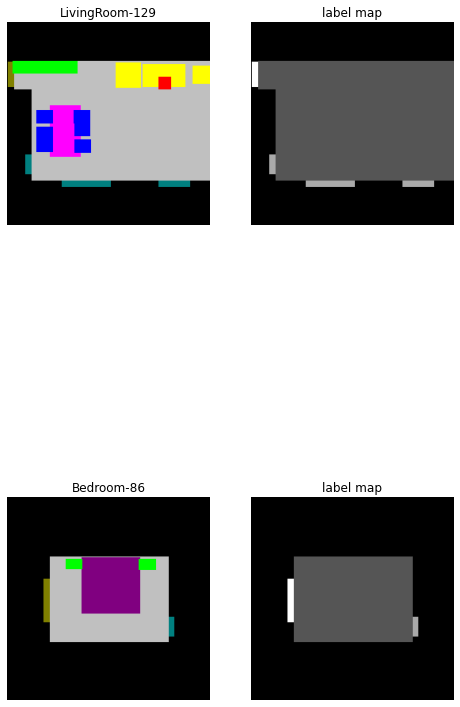

In [19]:
house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1ab0915f-3766-4f5c-8257-ba69f9b82e52-parsed.json"
name = "0a77986b-5c04-41b9-8ee8-1ea301ccda3e"
house = json.load(open(house_str))
house_instance = HouseInstance(house, name, logger)
house_instance.process_rooms()
# house_instance.save_images('test-images')

counter = 1
fig = plt.figure(figsize=(8, 16))
for room_ in house_instance.images:
    room = house_instance.images[room_]
    fig.add_subplot(len(house_instance.images), 2, counter)
    plt.imshow(room['image'])
    plt.axis('off')
    plt.title(room_)
    
    fig.add_subplot(len(house_instance.images), 2, counter + 1)
    plt.imshow(room['label_map'], cmap='gray')
    plt.axis('off')
    plt.title('label map')
    
    print(np.unique(room['label_map'].flatten()))
    
    counter += 2

[[255  71]
 [255 117]
 [255 117]
 [255  71]]
{'Bed': [128, 0, 128], 'Table': [255, 0, 255], 'Cabinet/Shelf/Desk': [0, 255, 0], 'Chair': [0, 0, 255], 'Lighting': [255, 0, 0]}


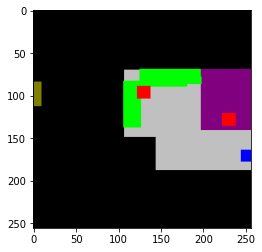

In [82]:
house = json.load(open(house_str))
zzz = json.load(open("test.json"))
room = RoomInstance(zzz, logger)
room.draw_room()
room.draw_label_map()
room.shift_images()
plt.imshow(room.img)
print(room.drawn_furniture)

In [75]:
house['MasterBedroom-33088']

{'sceneid': '00766588-c1d9-4039-ba22-a7e037c929b9',
 'instanceid': 'MasterBedroom-33088',
 'floor': [[0.125, -1.93685],
  [4.425, -1.93685],
  [4.425, -5.61686],
  [4.353, -5.61651],
  [4.201, -5.61579],
  [4.049, -5.61506],
  [3.897, -5.61434],
  [3.745, -5.61362],
  [3.593, -5.61289],
  [3.441, -5.61217],
  [3.289, -5.61144],
  [3.137, -5.61072],
  [2.985, -5.60999],
  [2.833, -5.60927],
  [2.681, -5.60855],
  [2.529, -5.60782],
  [2.377, -5.6071],
  [2.225, -5.60637],
  [2.073, -5.60565],
  [1.921, -5.60492],
  [1.769, -5.6042],
  [1.617, -5.60348],
  [1.465, -5.60275],
  [1.313, -5.60203],
  [1.161, -5.6013],
  [1.009, -5.60058],
  [0.857, -5.59985],
  [0.705, -5.59913],
  [0.553, -5.59841],
  [0.401, -5.59768],
  [0.249, -5.59696],
  [0.097, -5.59623],
  [-0.207, -5.59479],
  [-0.359, -5.59406],
  [-0.511, -5.59334],
  [-0.663, -5.59261],
  [-0.815, -5.59189],
  [-0.955, -5.59122],
  [-1.035, -5.59122],
  [-1.035, -3.13685],
  [0.125, -3.13685],
  [0.125, -1.93685]],
 'area': 18.6

In [ ]:
from PIL import Image
from torchvision import transforms as TR
import torch

def transforms(label):
    label = TR.functional.resize(label, (256, 256), Image.NEAREST)
#     print(label)
    # to tensor
    label = TR.functional.to_tensor(label)
    # normalize
    return label

label = Image.open('images/hehe.png')
print(label.getbands())
# print(torch.unique(label))
print(np.unique(label.numpy().flatten()))
label = transforms(label)
print(np.unique(label.numpy().flatten()))
print(label.numpy())
# print(torch.unique(label))
label = label * 255 + 1
print(label.numpy())
# label[label == 256] = 0 # unknown class should be zero for correct losses
# plt.imshow(label)
# print(torch.unique(label))
label[label == 256] = 0 # unknown class should be zero for correct losses
# print(torch.unique(label))
print(np.unique(label.numpy().flatten()))

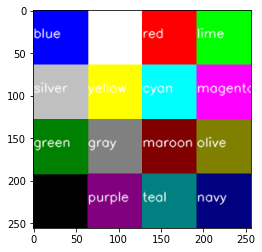

In [5]:
img = np.zeros((256,256, 3), np.uint8)
x0 = 0
x1 = 0
y0 = 0
y1 = 64

counter = 0
for color in colors:
    x1 = x0 + 64
    cv2.fillConvexPoly(img, np.array([[x0, y0], [x1, y0], [x1, y1], [x0, y1]]), colors[color])
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    thickness = 1
    image = cv2.putText(img, color, (x0, y1 - 32), font, fontScale, (255, 255, 255), thickness, cv2.LINE_AA)
    
    x0 = (x0 + 64) % 256
    if (counter != 0) and (counter % 4 == 0):
        y0 = y0 + 64
        y1 = y0 + 64
        
    counter += 1
    
plt.imshow(img)

(4, 4, 256, 256)
0.0


(4, 4, 256, 256)

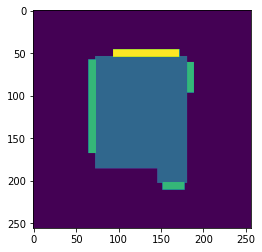

In [352]:
with open('test.npy', 'rb') as f:
    a = np.load(f, allow_pickle=True)
a.shape

# with open('test.npy', 'wb') as f:
#     np.save(f, np.array([1, 2]))
#     np.save(f, np.array([1, 3]))
# with open('test.npy', 'rb') as f:
#     a = np.load(f)
#     b = np.load(f)
print(a.shape)
x = a[0].transpose(1, 2, 0)
z = np.ones((256, 256))

for i in range(256):
    for j in range(256):
        if x[i][j].tolist() == [0, 0, 0, 1]:
            z[i][j] = 3
        if x[i][j].tolist() == [0, 0, 1, 0]:
            z[i][j] = 2
        if x[i][j].tolist() == [0, 1, 0, 0]:
            z[i][j] = 1
        if x[i][j].tolist() == [1, 0, 0, 0]:
            z[i][j] = 0
        
plt.imshow(z)
print(z[2, 2])
a.shape

In [375]:
import torch
yyy = [
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0]
]
y = torch.from_numpy(np.array(yyy)).type(torch.FloatTensor)
seg = torch.tensor(a)
z = torch.randn(seg.size(0), 10, dtype=torch.float32)
z = torch.cat((y, z), dim = 1)
# print(r.shape, y.shape, z.shape)
print(z[3])
z = z.view(z.size(0), 16, 1, 1)
# print(z[0])
z = z.expand(z.size(0), 16, seg.size(2), seg.size(3))
# print(z[1].permute(1, 2, 0)[0][0])
seg = torch.cat((z, seg), dim = 1)
seg[0].permute(1, 2, 0)[100][100]

tensor([ 1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000, -0.9565, -0.5105,
        -1.3751,  1.0084,  3.2907,  0.4362,  1.3959,  0.4204,  1.2359, -1.6438])


tensor([ 1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000, -0.7359,  0.3756,
         0.9026, -0.2097, -0.9919,  1.2168, -1.9178,  0.0203, -0.3754,  1.2649,
         0.0000,  1.0000,  0.0000,  0.0000])

[[-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.         -1.        ]
 [-1.         -1.        

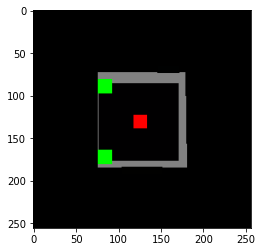

In [319]:
with open('test2.npy', 'rb') as f:
    a = np.load(f, allow_pickle=True)
x = a[2].transpose(1, 2, 0)
plt.imshow(x)
print(x[100])

In [347]:
from PIL import Image
image = Image.open("test-images/ttt.png")
img = np.array(image)
clrs = set(tuple(row) for row in np.unique(img.reshape(-1, img.shape[2]), axis=0).tolist())
clrs.discard((0, 0, 0))
for c in connection_colors:
    clrs.discard(tuple(colors[connection_colors[c]]))

layers = np.zeros(6)
for c in color_codes:
    if c in clrs:
        layers[color_codes[c] - 1] = 1
layers

array([1., 1., 1., 1., 1., 0.])

In [348]:
from PIL import Image
path = 'C:/Users/Flexatroid/Desktop/diploma/parsed/'

path_images = 'C:/Users/Flexatroid/Desktop/OASIS-master/OASIS/images'

data = dict()
for file in tqdm(os.listdir(path_images)):
    image = Image.open(path_images + '/' + file)
    img = np.array(image)
    clrs = set(tuple(row) for row in np.unique(img.reshape(-1, img.shape[2]), axis=0).tolist())
    clrs.discard((0, 0, 0))
    for c in connection_colors:
        clrs.discard(tuple(colors[connection_colors[c]]))

    layers = np.zeros(6)
    for c in color_codes:
        if c in clrs:
            layers[color_codes[c] - 1] = 1
    data[file] = layers.tolist()

100%|████████████████████████████████████████████████████████████████████████████████| 244/244 [00:10<00:00, 23.42it/s]


In [351]:
with open('C:/Users/Flexatroid/Desktop/diploma/noise_info.json', 'w') as outfile:
    json.dump(data, outfile, indent=None)

1.848046875 2.172265625
[[[169 105]]

 [[169 184]]

 [[182 184]]

 [[182 105]]]


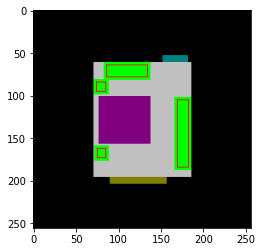

In [656]:
img = cv2.imread('detection-images/0aa05d5a-81d5-497b-832c-c90c3fe73a36_LivingDiningRoom-1171.png')[0:256][0:256]
# 0b105b2a-e368-40ef-90a3-a4c422b915b4_SecondBedroom-8019
house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0b105b2a-e368-40ef-90a3-a4c422b915b4-parsed.json"
name = "0b105b2a-e368-40ef-90a3-a4c422b915b4"
house = json.load(open(house_str))
room_instance = RoomInstance(house['SecondBedroom-8019'], logger)
room_instance.draw_room()
room_instance.draw_label_map()
room_instance.draw_plan()
room_instance.shift_images()
# hsv_img = cv2.cvtColor(img[0:256, 0:256], cv2.COLOR_BGR2HSV)
# hsv_lbl = cv2.cvtColor(img[0:256, (256):256], cv2.COLOR_BGR2HSV)
plan = cv2.inRange(room_instance.label_map, 1, 1)
contours, hierarchy = cv2.findContours(plan, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
M = cv2.moments(contours[0])

floor_poly = contours[0].reshape(contours[0].shape[0], 2)
floor_poly = floor_poly.astype(float)
cX = (M["m10"] / M["m00"] - floor_poly.T[0].min()) * (8.3 / 256)
cZ = (M["m01"] / M["m00"] - floor_poly.T[1].min()) * (8.3 / 256)
floor_poly.T[0] -= floor_poly.T[0].min()
floor_poly.T[1] -= floor_poly.T[1].min()
floor_poly.T[0] *= (8.3 / 256)
floor_poly.T[1] *= (8.3 / 256)

print(cX, cZ)
# img = room_instance.img
# cv2.drawContours(img, contours, -1, (0, 255, 255), 3)
# plt.imshow(img)
# print(abs(room_instance.xrange[1] - room_instance.xrange[0]))
# print(floor_poly)
# print(contours[0].reshape(contours[0].shape[0], 2))
# ret,thresh1 = cv2.threshold(room_instance.plan, 127, 255, cv2.THRESH_BINARY)

plan = cv2.inRange(room_instance.img, np.array([0, 255, 0]), np.array([0, 255, 0]))
# plt.imshow(plan)
# print(plan.shape)
kernel = np.ones((7, 7), 'uint8')
erode_img = cv2.erode(plan, kernel, iterations=1)

contours, hierarchy = cv2.findContours(erode_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# rect = cv2.minAreaRect(cnt)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(img,[box],0,(0,0,255),2)
# img = room_instance.img
cv2.drawContours(room_instance.img, contours, -1, (255, 0, 0), 1)
plt.imshow(room_instance.img)
print((contours[1]))

In [22]:
class ImageInstance:
    def __init__(self, img, label_map, plan):
        self.img = img
        self.label_map = label_map
        self.plan = plan
        self.initialize()
    
    def initialize(self):
        self.models_info = json.load(open(MODELS_INFO))
        
        assert self.img.shape[:2] == self.label_map.shape[:2] == self.plan.shape[:2], "Images have different shapes"
        self.img_size = self.img.shape[0]
        self.m_in_pixel = (8.3 / 256)
        
        self.door_height = 2.1
        self.wall_height = 2.7
        self.window_start = 0.8
        self.window_height = 1.7
        
        self.floor_mesh = None
        self.wall_meshes = None
        self.furniture_meshes = None
        self.center = None
        self.bboxes = dict()
        self.renderables = list()

    def render_image(self, show_axes=True, mode="auto"):
        if show_axes:
            axes = Lines.axes((self.center[0], 1.5, self.center[1]), width=0.05)
            self.renderables.append(axes)
        
        self.renderables.append(self.floor_mesh)
        
        for wall_mesh in self.wall_meshes:
            self.renderables.append(wall_mesh)
            
        
        for furniture_mesh in self.furniture_meshes:
            self.renderables.append(furniture_mesh)
        
#         m = TexturedMesh.from_file(
#             "C:/Users/Flexatroid/Desktop/diploma/3D-FRONT-base/3D-FUTURE-model/4b8f4ab6-ef15-4338-a6ec-7419db16382f/raw_model.obj"
#         )
#         self.renderables.append(m)
        camera_params = self.compute_camera_params()
        
        if mode == "auto":
            show(
                self.renderables,
                size=camera_params['size'],
                camera_position=camera_params['camera_position'],
                camera_target=camera_params['camera_target'],
                up_vector=camera_params['up_vector'],
                behaviours=[
                    CameraTrajectory(
                        Circle(camera_params['circle_center'], camera_params['circle_start'], camera_params['up_vector']),
                        speed=camera_params['speed']
                    ),
                    LightToCamera(offset=[-1, 0, -1]),
                ],
                light=(0, 0, 0),
                background=camera_params['background']
            )
        else:
            show(
                self.renderables,
                size=camera_params['size'],
                camera_position=camera_params['camera_position'],
                camera_target=camera_params['camera_target'],
                up_vector=camera_params['up_vector'],
                light=camera_params['light'],
                background=camera_params['background']
            )
    
    def process_image(self):
        self.restore_floor()
        self.restore_connections()
#         self.restore_walls()
        self.restore_walls_test()
        
        self.restore_furniture('Lighting')
        self.restore_furniture('Chair')
        self.restore_furniture('Cabinet/Shelf/Desk')
        self.restore_furniture('Sofa')
        self.restore_furniture('Table')
        self.restore_furniture('Bed')
        
        # remove bboxes for missing categories
        self.bboxes = dict(filter(lambda x: len(x[1]) > 0, self.bboxes.items()))
        
        self.furniture_meshes = list()
        if 'Bed' in self.bboxes:
            self.load_furniture('Bed', 'Modern')
            
        if 'Table' in self.bboxes:
            self.load_furniture('Table', 'Modern')
        
        if 'Cabinet/Shelf/Desk' in self.bboxes:
            self.load_furniture('Cabinet/Shelf/Desk', 'Modern')
        
        if 'Sofa' in self.bboxes:
            self.load_furniture('Sofa', 'Modern')
        
        if 'Chair' in self.bboxes:
            self.load_furniture('Chair', 'Modern')
        
#         if 'Lighting' in self.bboxes:
#             self.load_furniture('Lighting', 'Minimalist')
        
#         self.restore_test('Sofa')
#         'Cabinet/Shelf/Desk'
#         '30c39479-f359-4198-9e63-66448fca18f1'
#         '[3.79335938 4.08515625] [1.36171875 0.71328125]'

#         '66d0ac41-bf7a-45a0-bd33-9014bc3b49ce'
#         '71f48ed3-c9a2-4775-81f1-0561356178ad'
#         [4.70117188 5.60898487] [0.82659895 0.82659895]
#         [5.67382813 4.37695312] [2.334375   0.84296875]
#         [5.09834034 2.6829104 ] [0.77947472 0.7565489 ]

        
#         m = TexturedMesh.from_file(
#             "C:/Users/Flexatroid/Desktop/diploma/models/3D-FUTURE-model/30c39479-f359-4198-9e63-66448fca18f1/raw_model.obj"
#         )
#         m.offset = [3.79335938, 0, 4.08515625]
#         m.rotate_y(1.5708)
#         self.renderables.append(m)
        
        
#         m = TexturedMesh.from_file(
#             "C:/Users/Flexatroid/Desktop/diploma/models/3D-FUTURE-model/66d0ac41-bf7a-45a0-bd33-9014bc3b49ce/raw_model.obj"
#         )
#         m.offset = [4.70117188, 0, 5.60898487]
#         m.rotate_y(2.35619)
#         self.renderables.append(m)
        
#         m = TexturedMesh.from_file(
#             "C:/Users/Flexatroid/Desktop/diploma/models/3D-FUTURE-model/66d0ac41-bf7a-45a0-bd33-9014bc3b49ce/raw_model.obj"
#         )
#         m.offset = [5.09834034, 0, 2.6829104]
#         m.rotate_y(0.785398)
#         self.renderables.append(m)
        
#         m = TexturedMesh.from_file(
#             "C:/Users/Flexatroid/Desktop/diploma/models/3D-FUTURE-model/71f48ed3-c9a2-4775-81f1-0561356178ad/raw_model.obj"
#         )
#         m.offset = [5.67382813,0, 4.37695312]
#         m.rotate_y(1.5708)
#         self.renderables.append(m)

    def compute_camera_params(self):
        params = dict()
        floor_width = abs(self.floor_polygon.T[0].min() - self.floor_polygon.T[0].max())
        floor_height = abs(self.floor_polygon.T[1].min() - self.floor_polygon.T[1].max())
        radius = np.sqrt(floor_width ** 2 + floor_height ** 2) * 0.5
        
        params['camera_position'] = [self.center[0] + radius + 1, 8, self.center[1]]
        params['background'] = [1.0, 1.0, 1.0, 1.0]
        params['size'] = [800, 800]
        params['up_vector'] = [0, 1, 0]
        params['camera_target'] = [self.center[0], 0, self.center[1]]
        params['circle_center'] = [self.center[0], 8, self.center[1]]
        params['circle_start'] = [self.center[0] + radius + 1, 8, self.center[1]]
        params['speed'] = 0.005
        params['light'] = [self.center[0], 4, self.center[1]]
        return params
    
    def is_clockwise(self, polygon):
        sum = 0
        for i in range(len(floor_polygon) - 1):
            sum += (floor_polygon[i + 1][0] - floor_polygon[i][0]) * (floor_polygon[i + 1][1] + floor_polygon[i][1])
        return sum > 0
            
        
    
    def restore_walls_test(self):
        floor_polygon = self.floor_polygon.tolist()
        floor_polygon.append(floor_polygon[0])
        self.wall_meshes = list()
        
        for i in range(len(floor_polygon) - 1)[3:4]:
            point_start = floor_polygon[i]
            point_end = floor_polygon[i + 1]
            
            x1 = point_start[0]
            z1 = point_start[1]
            x2 = point_end[0]
            z2 = point_end[1]
            
            holes = list()
            normal = np.array([0, 0, 0])
            
            for door_ in self.bboxes['door']:
                door = np.array(door_[0]) * self.m_in_pixel
                door_start = door[0][0]
                door_end = door[1][0]
                
                if (not self.point_is_on_wall(point_start, point_end, door_start)) or \
                    (not self.point_is_on_wall(point_start, point_end, door_end)):
                        continue
                
                if (x1 < x2) and (door_start[0] > door_end[0]):
                    door_start, door_end = door_end, door_start
                    
                if (x1 > x2) and (door_start[0] < door_end[0]):
                    door_start, door_end = door_end, door_start
                    
                if (x1 == x2) and (z1 < z2) and (door_start[1] > door_end[1]):
                    door_start, door_end = door_end, door_start
                    
                if (x1 == x2) and (z1 > z2) and (door_start[1] < door_end[1]):
                    door_start, door_end = door_end, door_start

                holes.append(("door", [door_start, door_end]))
            
            for window_ in self.bboxes['window']:
                window = np.array(window_[0]) * self.m_in_pixel
                window_start = window[0][0]
                window_end = window[1][0]
                
                if (not self.point_is_on_wall(point_start, point_end, window_start)) or \
                    (not self.point_is_on_wall(point_start, point_end, window_end)):
                        continue
                
                if (x1 < x2) and (window_start[0] > window_end[0]):
                    window_start, window_end = window_end, window_start
                    
                if (x1 > x2) and (window_start[0] < window_end[0]):
                    window_start, window_end = window_end, window_start
                    
                if (x1 == x2) and (z1 < z2) and (window_start[1] > window_end[1]):
                    window_start, window_end = window_end, window_start
                    
                if (x1 == x2) and (z1 > z2) and (window_start[1] < window_end[1]):
                    window_start, window_end = window_end, window_start

                holes.append(("window", [window_start, window_end]))
            
            if (x1 < x2):
                holes.sort(key=lambda x: x[1][0][0], reverse=False)
            elif (x1 > x2):
                holes.sort(key=lambda x: x[1][0][0], reverse=True)
            elif (x1 == x2) and (z1 < z2):
                holes.sort(key=lambda x: x[1][0][1], reverse=False)
            elif (x1 == x2) and (z1 > z2):
                holes.sort(key=lambda x: x[1][0][1], reverse=True)
            
            current = np.array([x1, z1])
            uv_offset = 0
            perimeter = 0
            for hole_ in holes:
                hx1, hz1 = hole_[1][0]
                hx2, hz2 = hole_[1][1]
                
                wall_segment = np.array([
                    [current[0], 0, current[1]],
                    [current[0], self.wall_height, current[1]],
                    [hx1, self.wall_height, hz1],
                    [hx1, 0, hz1]
                ])
                
                if hole_[0] == "door":
                    door_segment = np.array([
                        [hx1, self.door_height, hz1],
                        [hx1, self.wall_height, hz1],
                        [hx2, self.wall_height, hz2],
                        [hx2, self.door_height, hz2]
                    ])
                elif hole_[0] == "window":
                    window_down = np.array([
                        [hx1, 0, hz1],
                        [hx1, self.window_start, hz1],
                        [hx2, self.window_start, hz2],
                        [hx2, 0, hz2]                        
                    ])
                    window_up = np.array([
                        [hx1, self.window_start + self.window_height, hz1],
                        [hx1, self.wall_height, hz1],
                        [hx2, self.wall_height, hz2],
                        [hx2, self.window_start + self.window_height, hz2]                        
                    ])
                
                if x1 == x2:
                    wall_segment = wall_segment[:, [1, 2]]
                    line_lambda =  lambda v: x2
                    indexes = [0, 1, 1]
                    flip = True
                else:
                    line_lambda = lambda v: ((v - x1) / (x2 - x1) * (z2 - z1) + z1)
                    wall_segment = wall_segment[:, [0, 1]]
                    indexes = [1, 1, 0]
                    flip = False
            
                self.wall_meshes.append(self.mesh_from_vertices(
                    wall_segment,
                    "3d8353a0-6fa6-42ed-a205-858d251e9251",
                    line_lambda,
                    indexes=indexes,
                    normal=normal.tolist(),
                    flip=flip,
                    uv_offset=uv_offset
                ))
                
                perimeter += np.linalg.norm([hx1 - current[0], hz1 - current[1]])
                uv_offset = perimeter % self.wall_height
                if hole_[0] == "door":
                    self.wall_meshes.append(self.mesh_from_vertices(
                        door_segment[:, [1, 2]] if x1 == x2 else door_segment[:, [0, 1]],
                        "3d8353a0-6fa6-42ed-a205-858d251e9251",
                        line_lambda,
                        indexes=indexes,
                        normal=normal.tolist(),
                        flip=flip,
                        uv_offset=uv_offset
                    ))
                elif hole_[0] == "window":
                    self.wall_meshes.append(self.mesh_from_vertices(
                        window_down[:, [1, 2]] if x1 == x2 else window_down[:, [0, 1]],
                        "3d8353a0-6fa6-42ed-a205-858d251e9251",
                        line_lambda,
                        indexes=indexes,
                        normal=normal.tolist(),
                        flip=flip,
                        uv_offset=uv_offset
                    ))
                    self.wall_meshes.append(self.mesh_from_vertices(
                        window_up[:, [1, 2]] if x1 == x2 else window_up[:, [0, 1]],
                        "3d8353a0-6fa6-42ed-a205-858d251e9251",
                        line_lambda,
                        indexes=indexes,
                        normal=normal.tolist(),
                        flip=flip,
                        uv_offset=uv_offset
                    ))
                current = np.array([hx2, hz2])
            
            perimeter += np.linalg.norm([x2 - current[0], z2 - current[1]])
            uv_offset = perimeter % self.wall_height
            wall_segment = np.array([
                [current[0], 0, current[1]],
                [current[0], self.wall_height, current[1]],
                [x2, self.wall_height, z2],
                [x2, 0, z2]
            ])
            
            if x1 == x2:
                line_lambda = lambda v: x2
            else:
                line_lambda = lambda v: ((v - x1) / (x2 - x1) * (z2 - z1) + z1)
            
            self.wall_meshes.append(self.mesh_from_vertices(
                wall_segment[:, [1, 2]] if x1 == x2 else wall_segment[:, [0, 1]],
                "3d8353a0-6fa6-42ed-a205-858d251e9251",
                line_lambda,
                indexes=[0, 1, 1] if x1 == x2 else [1, 1, 0],
                normal=normal.tolist(),
                flip=True if x1 == x2 else False,
                uv_offset=uv_offset
            ))
        
    
    def restore_walls(self, mode="no_shadows"):
        floor_polygon = self.floor_polygon.tolist()
        floor_polygon.append(floor_polygon[0])
        
        self.wall_meshes = list()
        for i in range(len(floor_polygon) - 1):
            point_start = floor_polygon[i]
            point_end = floor_polygon[i + 1]
            if point_start[0] > point_end[0]:
                point_start, point_end = point_end, point_start
            elif (point_start[0] == point_end[0]) and (point_start[1] < point_end[1]):
                point_start, point_end = point_end, point_start
                
            x1 = point_start[0]
            z1 = point_start[1]
            x2 = point_end[0]
            z2 = point_end[1]
            x3 = self.center[0]
            z3 = self.center[1]
            
            wall = [
                [x1, 0, z1],
                [x1, self.wall_height, z1],
                [x2, self.wall_height, z2],
                [x2, 0, z2]
            ]
            
            # calculating normal vector of current wall
            # vector pointing to the inside part of the house
            u = ((x3 - x1) * (x2 - x1) + (z3 - z1) * (z2 - z1)) / ((x2 - x1) ** 2 + (z2 - z1) ** 2)
            x = x1 + u * (x2 - x1)
            z = z1 + u * (z2 - z1)
            normal = np.array([x3 - x, 0, z3 - z]) / max(abs(x - x3), abs(z - z3))
            
            dx = x2 - x1
            dz = z2 - z1
            normal1 = np.array([-dz, dx]) / max(abs(dz), abs(dx))
            normal2 = np.array([dz, -dx]) / max(abs(dz), abs(dx))
            
            if mode == "no_shadows":
                normal = np.array([0, 0, 0])
            else:
                if (self.point_is_in_floor((x1 + x2) /2 + normal1[0] * 0.15, (z1+z2)/2 + normal1[1] * 0.15)):
                    normal = np.array([normal1[0], 0, normal1[1]])
                else:
                    normal = np.array([normal2[0], 0, normal2[1]])

            holes = list()
            for door_ in self.bboxes['door']:
                door = np.array(door_[0]) * self.m_in_pixel
                door_start = door[0][0]
                door_end = door[1][0]
                if x2 - x1 == 0:       
                    if door_start[1] < door_end[1]:
                        door_start, door_end = door_end, door_start
                else:
                    if door_start[0] < door_end[0]:
                        door_start, door_end = door_end, door_start

                if self.point_is_on_wall(point_start, point_end, door_start):
                    if self.point_is_on_wall(point_start, point_end, door_end):
                        holes.append(("door", [door_start, door_end]))
            
            for window_ in self.bboxes['window']:
                window = np.array(window_[0]) * self.m_in_pixel
                window_start = window[0][0]
                window_end = window[1][0]
                print('t', window_start, window_end)
                if x2 - x1 == 0:       
                    if window_start[1] < window_end[1]:
                        window_start, window_end = window_end, window_start
                else:
                    if window_start[0] < window_end[0]:
                        window_start, window_end = window_end, window_start

                if self.point_is_on_wall(point_start, point_end, window_start):
                    if self.point_is_on_wall(point_start, point_end, window_end):
                        holes.append(("window", [window_start, window_end]))

            if x2 - x1 == 0:
                holes.sort(key=lambda x: x[1][0][1], reverse=True)
                # assuming start_z < end_z
            else:
                holes.sort(key=lambda x: x[1][0][0], reverse=True)
                # assuming starts < ends always
            
            for hole_ in holes:
                hole = hole_[1]
                hole_start = hole[0]
                hole_end = hole[1]
                
                if hole_[0] == "door":
                    if x2 - x1 == 0:
                        wall += [
                            [x1, 0, hole[0][1]],
                            [x1, self.door_height, hole[0][1]],
                            [x1, self.door_height, hole[1][1]],
                            [x1, 0, hole[1][1]]
                        ]
                    else:
                        # possibly not working for complex walls
                        wall += [
                            [hole_start[0], 0, hole_start[1]],
                            [hole_start[0], self.door_height, hole_start[1]],
                            [hole_end[0], self.door_height, hole_end[1]],
                            [hole_end[0], 0, hole_end[1]]
                        ]
                        
                if hole_[0] == "window":
                    if x2 - x1 == 0:
                        print('s', hole_start[1], hole_end[1], wall)
                        wall += [
                            [hole_start[0], 0, hole_start[1]],
                            [hole_start[0], self.window_start + self.window_height, hole_start[1]],
                            [hole_end[0], self.window_start + self.window_height, hole_end[1]],
                            [hole_end[0], 0, hole_end[1]]
#                             [hole_start[0], self.window_start, hole_start[1]],
#                             [hole_start[0], 0, hole_start[1]]
                        ]
                        print(wall)
                    else:
                        # possibly not working for complex walls
                        wall += [
                            [hole_start[0], 0, hole_start[1]],
                            [hole_start[0], self.window_start + self.window_height, hole_start[1]],
                            [hole_end[0], self.window_start + self.window_height, hole_end[1]],
                            [hole_end[0], self.window_start, hole_end[1]],
                            [hole_start[0], self.window_start, hole_start[1]],
                            [hole_start[0], 0, hole_start[1]]
                        ]
                        print(wall)
                        
            if x2 - x1 == 0:
                projected_wall = np.array(wall)[:, [1, 2]]
                line_lambda =  lambda v: x2
                indexes = [0, 1, 1]
                flip = True
            else:
                line_lambda = lambda v: ((v - x1) / (x2 - x1) * (z2 - z1) + z1)
                projected_wall = np.array(wall)[:, [0, 1]]
                indexes = [1, 1, 0]
                flip = False
            
            mesh = self.mesh_from_vertices(
                projected_wall,
                "3d8353a0-6fa6-42ed-a205-858d251e9251",
                line_lambda,
                indexes=indexes,
                normal=normal.tolist(),
                flip=flip
            )
            self.wall_meshes.append(mesh)
    
    def restore_floor(self):
        floor_mask = cv2.inRange(self.label_map, connection_codes['floor'], connection_codes['floor'])
        contours, hierarchy = cv2.findContours(floor_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        moments = cv2.moments(contours[0])
        
        floor_poly = contours[0].reshape(contours[0].shape[0], 2)
        floor_poly = floor_poly.astype(float)
        
        # calculating geometric center (centroid) of floor polygon
        # center_x = (moments["m10"] / moments["m00"] - floor_poly.T[0].min()) * self.m_in_pixel
        # center_z = (moments["m01"] / moments["m00"] - floor_poly.T[1].min()) * self.m_in_pixel
        
        # shifting floor polygon to the start of the coordinates is unessential 
        # floor_poly.T[0] -= floor_poly.T[0].min()
        # floor_poly.T[1] -= floor_poly.T[1].min()
        
        floor_poly.T[0] *= self.m_in_pixel
        floor_poly.T[1] *= self.m_in_pixel
        
        center_x = 0.5 * (floor_poly.T[0].min() + floor_poly.T[0].max())
        center_z = 0.5 * (floor_poly.T[1].min() + floor_poly.T[1].max())
        self.center = (center_x, center_z)
        self.floor_polygon = floor_poly
        self.floor_mesh = self.mesh_from_vertices(
            floor_poly, "14c80153-146d-4501-9f4e-7379ed7a60f5",
            lambda x: 0,
            indexes=[1, 0, 1], normal=[0, 1, 0])
    
    def restore_furniture(self, category):
        if category == 'Table':
            self._restore_tables()
            return
        
        color = furniture_colors[category]
        color_rgb = np.array(colors[color])
        floor_color_rgb = np.array(colors[connection_colors['floor']])
        colors_above_rgb = np.array(list(map(lambda x: np.array(colors[x]), colors_above[color])))
        self.bboxes[category] = list()
        
        # assuming img is perfect, otherwise should probably convert to hsv and apply
        # different color ranges (e.g. upper_red, lower_red in hsv)
        furniture_mask = cv2.inRange(self.img, color_rgb, color_rgb)
        contours, hierarchy = cv2.findContours(furniture_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours, hierarchy = self.filter_contours(contours, hierarchy)
        
        for contour in contours:
            rect = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
            if self.fits_area(contour):
                self.bboxes[category].append((contour, rect))
                continue

#             mask = np.zeros(self.label_map.shape, dtype='uint8')
#             cv2.drawContours(mask, [rect], 0, 255, -1)
#             inverted_mask = cv2.bitwise_not(mask)
#             source = np.full(self.img.shape, 255, dtype='uint8')

#             foreground = cv2.bitwise_and(self.img, self.img, mask=mask)
#             background = cv2.bitwise_and(source, source, mask=inverted_mask)
#             result = cv2.add(background, foreground)

#             in_area = cv2.countNonZero(mask)

#             in_area_floor = cv2.countNonZero(cv2.inRange(result, floor_color_rgb, floor_color_rgb))
#             in_area_furniture = cv2.countNonZero(cv2.inRange(result, color_rgb, color_rgb)) 

#             in_area_colors = set(tuple(row) for row in np.unique(result.reshape(-1, result.shape[2]), axis=0).tolist())
#             in_area_colors = in_area_colors.intersection(set(tuple(row) for row in colors_above_rgb))

            if self.contour_is_overlapped(contour):
                self.bboxes[category].append((contour, rect))
                continue
            else:
                contour_mask = np.zeros(self.label_map.shape, dtype='uint8')
                cv2.drawContours(contour_mask, [contour], 0, 255, -1)
                masked = cv2.bitwise_and(self.img, self.img, mask=contour_mask)
                masked = cv2.inRange(masked, color_rgb, color_rgb)
                
                for kernel_dim in range(1, 10):
                    kernel = np.ones((kernel_dim, kernel_dim), 'uint8')
                    eroded = cv2.erode(masked, kernel, iterations=1)
                    sub_contours, sub_hierarchy = cv2.findContours(eroded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                    sub_contours, sub_hierarchy = self.filter_contours(sub_contours, sub_hierarchy)
                    
                    if self.all_fit(sub_contours, 0.9):
                        shrink_size = kernel_dim // 2
                        for sub_contour in sub_contours:
                            moments = cv2.moments(sub_contour)
                            center_x = int(moments["m10"] / moments["m00"])
                            center_z = int(moments["m01"] / moments["m00"])
                            for row in sub_contour:
                                row[0][0] += shrink_size * (1 if row[0][0] > center_x else -1)
                                row[0][1] += shrink_size * (1 if row[0][1] > center_z else -1)
                            sub_rect = np.int0(cv2.boxPoints(cv2.minAreaRect(sub_contour)))
                            self.bboxes[category].append((sub_contour, sub_rect))
                        break
                # other shapes are undetectable (e.g. 'L-shape' - 2 intersecting models)
    
    def _restore_tables(self):
        color = furniture_colors['Table']
        color_rgb = np.array(colors[color])
        floor_color_rgb = np.array(colors[connection_colors['floor']])
        colors_above_rgb = np.array(list(map(lambda x: np.array(colors[x]), colors_above[color])))
        self.bboxes['Table'] = list()
        
        furniture_mask = cv2.inRange(self.img, color_rgb, color_rgb)
        structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (18, 18))
        connected = cv2.morphologyEx(furniture_mask, cv2.MORPH_CLOSE, structuring_element)
        
        contours, hierarchy = cv2.findContours(connected, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours, hierarchy = self.filter_contours(contours, hierarchy)
        
        for contour in contours:
            rect = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
            self.bboxes['Table'].append((contour, rect))
    
    def restore_connections(self):
        window_mask = cv2.inRange(self.label_map, connection_codes['window'], connection_codes['window'])
        door_mask = cv2.inRange(self.label_map, connection_codes['door'], connection_codes['door'])
        floor_mask = cv2.inRange(self.label_map, connection_codes['floor'], connection_codes['floor'])
        self.bboxes['window'] = list()
        self.bboxes['door'] = list()
        
        contours_f, hierarchy_f = cv2.findContours(floor_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours_d, hierarchy_d = cv2.findContours(door_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contours_w, hierarchy_w = cv2.findContours(window_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
        
        blank = np.zeros((self.img_size, self.img_size), dtype='uint8')
        doors = cv2.bitwise_and(
            cv2.drawContours(blank.copy(), contours_d, -1, 1, 2),
            cv2.drawContours(blank.copy(), contours_f, -1, 1, 1)
        )
        contours_doors, _ = cv2.findContours(doors, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        blank = np.zeros((self.img_size, self.img_size), dtype='uint8')
        windows = cv2.bitwise_and(
            cv2.drawContours(blank.copy(), contours_w, -1, 1, 2),
            cv2.drawContours(blank.copy(), contours_f, -1, 1, 1)
        )
        contours_windows, _ = cv2.findContours(windows, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours_doors:
            rect = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
            self.bboxes['door'].append((contour, rect))
        
        for contour in contours_windows:
            rect = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
            self.bboxes['window'].append((contour, rect))
    
    def point_is_on_wall(self, wall_start, wall_end, point, threshold=0.05):
        a, b, p = wall_start, wall_end, point
        
        cross = (p[1] - a[1]) * (b[0] - a[0]) - (p[0] - a[0]) * (b[1] - a[1])
        if (abs(cross) > threshold):
            return False

        dot = (p[0] - a[0]) * (b[0] - a[0]) + (p[1] - a[1]) * (b[1] - a[1])
        if (dot < 0):
            return False

        squared = (b[0] - a[0]) * (b[0] - a[0]) + (b[1] - a[1]) * (b[1] - a[1])
        if (dot > squared):
            return False

        return True
    
    def point_is_in_floor(self, x, z):
        floor_mask = cv2.inRange(self.label_map, connection_codes['floor'], connection_codes['floor'])
        contours, _ = cv2.findContours(floor_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        x *= (256.0 / 8.3)
        z *= (256.0 / 8.3)
        
        return cv2.pointPolygonTest(contours[0], (int(x), int(z)), measureDist=False) >= 0
    
    def contour_is_overlapped(self, contour):
        floor_color_rgb = np.array(colors[connection_colors['floor']])
        
        rect = np.int0(cv2.boxPoints(cv2.minAreaRect(contour)))
        mask = np.zeros((self.img_size, self.img_size), dtype='uint8')
        cv2.drawContours(mask, [rect], 0, 255, -1)
        inverted_mask = cv2.bitwise_not(mask)
        source = np.full((self.img_size, self.img_size, 3), 255, dtype='uint8')

        foreground = cv2.bitwise_and(self.img, self.img, mask=mask)
        background = cv2.bitwise_and(source, source, mask=inverted_mask)
        result = cv2.add(background, foreground)

        in_area = cv2.countNonZero(mask)
        in_area_floor = cv2.countNonZero(cv2.inRange(result, floor_color_rgb, floor_color_rgb))
        return (in_area_floor == 0) or (in_area_floor / in_area < 0.1)
    
    def all_fit(self, contours, threshold=0.9):
        for contour in contours:
            if not self.contour_is_overlapped(contour):
                if not self.fits_area(contour, threshold):
                    return False
        return True
    
    def fits_area(self, contour, threshold=0.9):
        expected = cv2.contourArea(contour)
        rect = cv2.minAreaRect(contour)
        actual = rect[1][0] * rect[1][1]
        return (expected / actual) > threshold
    
    def all_rectangles(self, contours):
        for contour in contours:
            if np.squeeze(contour).shape[0] != 4:
                return False
        return True
    
    def filter_contours(self, contours, hierarchy):
        if hierarchy is None:
            return contours, hierarchy
        
        indexes = list()
        for i, h in enumerate(hierarchy[0]):
            if h[3] == -1:
                indexes.append(i)
        new_hierarchy = np.array([[hierarchy[0][i] for i in indexes]])
        new_contours = tuple([contours[i] for i in indexes])
        return new_contours, new_hierarchy
    
    def print_bboxes(self):
        counter = 1
        fig = plt.figure(figsize=(10, 4 * (len(self.bboxes) + 1)))
        for category in self.bboxes:
            bboxes_ = self.bboxes[category]
            fig.add_subplot((len(self.bboxes) + 1), 2, counter)
            img_copy1 = self.img.copy()
            img_copy2 = self.img.copy()
            for contour, rect in bboxes_:
                cv2.drawContours(img_copy1, [contour], 0, (255, 255, 255), 2)
                cv2.drawContours(img_copy2, [rect], 0, (255, 255, 255), 2)
            plt.imshow(img_copy1)
            plt.axis('off')
            plt.title(category + ": " + str(len(bboxes_)))

            fig.add_subplot((len(self.bboxes) + 1), 2, counter + 1)
            plt.imshow(img_copy2)
            plt.axis('off')
            plt.title('bounding rects')
            
            counter += 2
    
    def mesh_from_vertices(self, polygon, texture, line, indexes=[1, 0, 1], normal=[0, 1, 0], uv_offset=None, flip=False):
        vertices = list()
        uv = list()
        normals = list()
        triangles = np.array(tripy.earclip(polygon))

        for triangle in triangles:
            triangle_points = np.zeros((3, 3))
            counter = 0
            for i, used in enumerate(indexes):
                triangle_points[0][i] = triangle[0][counter] if used else line(triangle[0][0])
                triangle_points[1][i] = triangle[1][counter] if used else line(triangle[1][0])
                triangle_points[2][i] = triangle[2][counter] if used else line(triangle[2][0])
                counter += 1 if used else 0

            vertices += triangle_points.tolist()
            normals += [normal, normal, normal]
            if flip:
                uv += triangle[:, [1, 0]].tolist()
            else:
                uv += triangle.tolist()

        uv = np.array(uv).astype(float)
        
        if uv_offset is None:
            uv.T[0] = (uv.T[0] - uv.T[0].min()) / uv.T[0].max()
            uv.T[1] = (uv.T[1] - uv.T[1].min()) / uv.T[1].max()
        else:
            print(uv)
            uv.T[0] = (uv.T[0] - uv.T[0].min() + uv_offset) % self.wall_height / self.wall_height
            uv.T[1] = uv.T[1] / self.wall_height
            print(uv, uv_offset)

        path = os.path.join(FRONT_3D_TEXTURE, texture, "texture.png")
        mtl = Material.with_texture_image(path, mode='constant', ambient=(1.0, 1.0, 1.0))
        
        # another way of applying shadows, currently for better performance
        # constant shadowing with [0, 0, 0] normals is used
        # mtl = Material.with_texture_image(path, ambient=(0.8, 0.8, 0.8))
        return TexturedMesh(vertices, normals, uv,  mtl)
    
    def mesh_from_model(self, model, offset, rotation):
        path = os.path.join(FRONT_3D_MODELS, model, "raw_model.obj")
        mesh = TexturedMesh.from_file(path)
        mesh.offset = offset
        mesh.rotate_x(rotation[0])
        mesh.rotate_y(rotation[1])
        mesh.rotate_z(rotation[2])
        return mesh
    
    def sample_models(self, category, style, x, z, y=None, count=5, threshold=0.05):
        ignore_style = True
        
        def satisfies(m):
            m = m[1]
            bbox = m['boundingBox']
            
            if m['super-category'] != category:
                return False
            
            if not (
                ((bbox['xLen'] * 0.01 * (1 - threshold) < x < bbox['xLen'] * 0.01 * (1 + threshold)) and
                (bbox['zLen'] * 0.01 * (1 - threshold) < z < bbox['zLen'] * 0.01 * (1 + threshold))) or
                ((bbox['xLen'] * 0.01 * (1 - threshold) < z < bbox['xLen'] * 0.01 * (1 + threshold)) and
                (bbox['zLen'] * 0.01 * (1 - threshold) < x < bbox['zLen'] * 0.01 * (1 + threshold)))
            ):
                return False
            
            if y is not None:
                if not (bbox['yLen'] * 0.01 * (1 - threshold) < y < bbox['yLen'] * 0.01 * (1 + threshold)):
                    return False
            
            if not ignore_style:
                if m['style'] != style:
                    return False
            
            return True
        
        models = list(self.models_info.items())
        filtered = list(filter(satisfies, models))
        if not filtered:
            ignore_style = True
            filtered = list(filter(satisfies, models))
        
        if not filtered:
            filtered = list(filter(lambda x: x[1]['super-category'] == category, models))
        
        if not filtered:
            threshold = 0.2
            filtered = list(filter(satisfies, models))
        
        print(len(filtered))
        return sample(filtered, min(count, len(filtered)))
    
    def load_furniture(self, category, style):
        points_data = []
        for _, rect in image_instance.bboxes[category]:
            rect = cv2.minAreaRect(rect)
            sizes = np.array(rect[1]) * image_instance.m_in_pixel
            if sizes[0] > sizes[1]:
                sizes[0], sizes[1] = sizes[1], sizes[0]
            points_data.append([sizes[0], sizes[1]])
            
        model = DBSCAN(eps=0.05, min_samples=1)
        yhat = model.fit_predict(points_data)
        clusters = unique(yhat)
        for cluster in clusters:
            indexes = where(yhat == cluster)
            
            # calculate average size in cluster
            sizes_list = list()
            indexes = np.array(indexes)[0]
            for index in indexes:
                _, rect = image_instance.bboxes[category][index]
                rect = cv2.minAreaRect(rect)
                sizes_list.append(np.array(rect[1]) * image_instance.m_in_pixel)
            avg_x, avg_z = np.mean(np.array(sizes_list).T[0]), np.mean(np.array(sizes_list).T[1])

            model = self.sample_models(category, style, avg_x, avg_z, count=1)[0][0]
            print(category, model, " looking for ", avg_x, avg_z)
#             print("found: ", )
            for index in indexes:
                _, rect = image_instance.bboxes[category][index]
                rect = cv2.minAreaRect(rect)
                
                center = np.array(rect[0]) * image_instance.m_in_pixel
                offset = [center[0], 0, center[1]]
                rotation = [0, 2 * rect[2] * np.pi / 180, 0]
                self.furniture_meshes.append(self.mesh_from_model(model, offset, rotation))

[[2.78828125 0.        ]
 [2.36679688 0.        ]
 [2.36679688 2.7       ]
 [2.78828125 0.        ]
 [2.36679688 2.7       ]
 [2.78828125 2.7       ]]
[[0.15610532 0.        ]
 [0.         0.        ]
 [0.         1.        ]
 [0.15610532 0.        ]
 [0.         1.        ]
 [0.15610532 1.        ]] 0
[[5.51171875 0.        ]
 [2.78828125 0.        ]
 [2.78828125 0.8       ]
 [5.51171875 0.        ]
 [2.78828125 0.8       ]
 [5.51171875 0.8       ]]
[[0.16478588 0.        ]
 [0.15610532 0.        ]
 [0.15610532 0.2962963 ]
 [0.16478588 0.        ]
 [0.15610532 0.2962963 ]
 [0.16478588 0.2962963 ]] 0.4214843749999999
[[5.51171875 2.5       ]
 [2.78828125 2.5       ]
 [2.78828125 2.7       ]
 [5.51171875 2.5       ]
 [2.78828125 2.7       ]
 [5.51171875 2.7       ]]
[[0.16478588 0.92592593]
 [0.15610532 0.92592593]
 [0.15610532 1.        ]
 [0.16478588 0.92592593]
 [0.15610532 1.        ]
 [0.16478588 1.        ]] 0.4214843749999999
[[5.93320313 0.        ]
 [5.51171875 0.        ]
 [5.

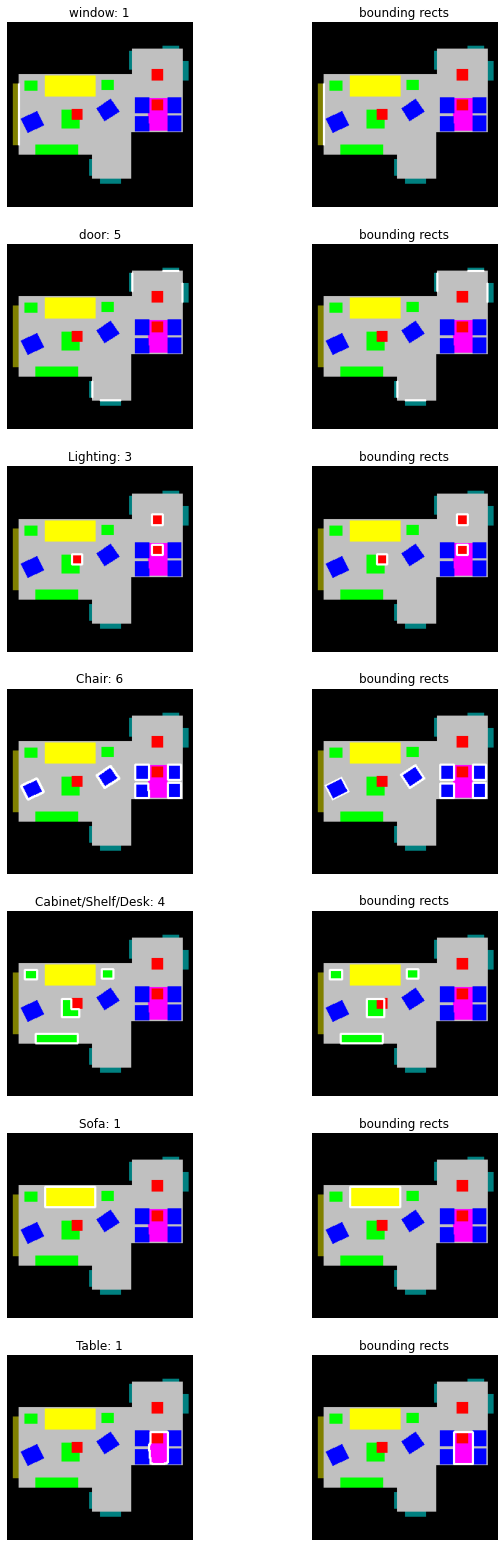

In [23]:
# EXAMPLE: cabinet overlapped by lighting
# "1f397944-0127-417c-aebc-397096d2614d_SecondBedroom-5581"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1f397944-0127-417c-aebc-397096d2614d-parsed.json"


# EXAMPLE: touching cabinets 
# "0b105b2a-e368-40ef-90a3-a4c422b915b4_SecondBedroom-8019"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0b105b2a-e368-40ef-90a3-a4c422b915b4-parsed.json"


# EXAMPLE: rotating sofas
# "0ca61cac-dc02-4196-b4d6-752299c42d80_LivingRoom-2958"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0ca61cac-dc02-4196-b4d6-752299c42d80-parsed.json"


# EXAMPLE: many doors, complex chairs - rotated + touch
# "01ba1742-4fa5-4d1e-8ba4-2f807fe6b283_LivingDiningRoom-4271"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/01ba1742-4fa5-4d1e-8ba4-2f807fe6b283-parsed.json"


# EXAMPLE: many doors, complex chairs - rotated + overlapped by lighting
# "fe49d5e3-8a9e-4e22-ab9a-414b2553a561_LivingDiningRoom-3743"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/fe49d5e3-8a9e-4e22-ab9a-414b2553a561-parsed.json"


# EXAMPLE: many doors, complex chairs with different sizes
# "0c1cea01-e28f-45dd-87df-6f906054c364_LivingDiningRoom-21426"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0c1cea01-e28f-45dd-87df-6f906054c364-parsed.json"


# EXAMPLE: perfect room with everything
# "1dee9ed4-fea7-462f-9eec-34f24de361af_LivingRoom-1667"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1dee9ed4-fea7-462f-9eec-34f24de361af-parsed.json"


# EXAMPLE: rotating sofas
# "1dc74c70-21d3-40c6-8bd4-afb94dab934c_LivingRoom-12208"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1dc74c70-21d3-40c6-8bd4-afb94dab934c-parsed.json"


# EXAMPLE: door + window on a single wall, chairs inside table
# "0aa05d5a-81d5-497b-832c-c90c3fe73a36_LivingDiningRoom-1171"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0aa05d5a-81d5-497b-832c-c90c3fe73a36-parsed.json"


# EXAMPLE: door + window on a single wall, chairs inside table
# "0aa05d5a-81d5-497b-832c-c90c3fe73a36_Bedroom-7833"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/6c45080c-c6df-43f6-a79c-476681818111-parsed.json"

# "1dee9ed4-fea7-462f-9eec-34f24de361af_LivingRoom-1667"
# house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1cf94f82-50bc-4805-94d5-a8b52b66be31-parsed.json"

house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/0ac97866-dccb-47c3-b220-79712041e187-parsed.json"
# 0ac97866-dccb-47c3-b220-79712041e187_MasterBedroom-4017

house_str = "C:/Users/Flexatroid/Desktop/diploma/parsed/1cf94f82-50bc-4805-94d5-a8b52b66be31-parsed.json"
# 1cf94f82-50bc-4805-94d5-a8b52b66be31_


house = json.load(open(house_str))
room_instance = RoomInstance(house['LivingDiningRoom-54997'], logger)
room_instance.draw_room()
room_instance.draw_label_map()
room_instance.draw_plan()
room_instance.shift_images()

image_instance = ImageInstance(room_instance.img, room_instance.label_map, room_instance.plan)
image_instance.process_image()
image_instance.print_bboxes()
image_instance.render_image(show_axes=True, mode="")
# print(image_instance.bboxes['Cabinet/Shelf/Desk'])
# for cnt, rect in image_instance.bboxes['Cabinet/Shelf/Desk']:
# #     rect = rect.astype(float)
# #     rect.T[0] -= rect.T[0].min()
# #     rect.T[1] -= rect.T[1].min()
# #     rect.T[0] *= image_instance.m_in_pixel
# #     rect.T[1] *= image_instance.m_in_pixel
    
# #     print(type(rect))
#     rect = cv2.minAreaRect(rect)
#     sizes = np.array(rect[1]) * image_instance.m_in_pixel
#     center = np.array(rect[0]) * image_instance.m_in_pixel
#     print(center, sizes, sizes[0] * sizes[1], rect[2])
# # plt.imshow(image_instance.img)

In [ ]:
[-1. -0. -0.]
[ 0.  0. -1.]
[ 1. -0. -0.]
[0. 0. 1.]

In [9]:
from simple_3dviz import Mesh, Scene, Lines, TexturedMesh
from simple_3dviz.behaviours.misc import LightToCamera
from simple_3dviz.behaviours.movements import CameraTrajectory
from simple_3dviz.behaviours.trajectory import Circle
from simple_3dviz.renderables.textured_mesh import Material
from simple_3dviz.window import show
import tripy
from random import sample

In [13]:
from simple_3dviz import Mesh, Scene, Lines, TexturedMesh
from simple_3dviz.window import show
import numpy as np
import tripy
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

poly = [(0, 0), (0, 5), (5, 5), (5, 0), (3, 0), (3, 3), (1, 3), (1, 1), (3, 1), (3, 0)]
triangles = tripy.earclip(floor_poly)
triangles_vertices = []
triangles_faces = []
print(triangles)
# ((0, 0), (1, 0), (1, 1)) --- ((0, 0), (1, 1), (0, 1))
for i, t in enumerate(triangles):
    triangles_vertices.append([t[0][0], 0, t[0][1]])
    triangles_vertices.append([t[1][0], 0, t[1][1]])
    triangles_vertices.append([t[2][0], 0, t[2][1]])
    index = len(triangles_faces) * 3
    triangles_faces.append((index, index + 1, index + 2))

print(triangles_vertices)
print(triangles_faces)

# m = Mesh.from_file("model-1/normalized_model.obj")
# m.offset = [1, 0, 1]

t = np.linspace(-np.pi, np.pi, 16)
z = np.exp(1j * t)
x = z.real.copy()
y = z.imag.copy()
z = np.zeros_like(x)

faces = [(0, i, i + 1) for i in range(1, 16)]
x = np.r_[0, x]
y = np.r_[0, y]
z = np.r_[1, z]
vertices = np.stack([x, y, z]).T
# colors = np.ones((len(points), 3))*[1.0, 0.0, 0.0]
print(vertices)
print(faces)
m2 = Mesh.from_faces(vertices, faces)
m3 = Mesh.from_faces(triangles_vertices, triangles_faces, (1.0, 0.0, 0.0, 1))
l = Lines([
    [0.0, 0.0, 0.0],
    [0.6, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.6, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.6]
],
    colors=np.array([
        [1.0, 0.0, 0.0, 1.0],
        [1.0, 0.0, 0.0, 1.0],
        [0.0, 1.0, 0.0, 1.0],
        [0.0, 1.0, 0.0, 1.0],
        [0.0, 0.0, 1.0, 1.0],
        [0.0, 0.0, 1.0, 1.0]
    ]), width=0.02)

tmp = Lines([
    [1.0, 0.0, 0.0],
    [2.0, 0.0, 0.0],
])

show([m3, l], camera_position=(cX, 5, cZ-0.01), camera_target=(cX, 0, cZ), up_vector=(0, 1, 0), light=(cX, 0, cZ), background=(0, 0, 0, 1))
# Preview the mesh in an OpenGL window if you installed wxpython with pip
# Note that you can specify the size (size) and the background color
# (background) of the rendered window as well as the position of the camera in
# the scene (camera_position), its viewing direction (camera_target) and the 3d
# direction that indicates which direction is "up" (up_vector). Finally you can
# also specify the location of the light source as well a set of behaviours to
# be performed.
# show(m, camera_position=(5., 5, 5), camera_target=(0., 0, 0),
#      light=(10, 10, 10))


NameError: name 'floor_poly' is not defined

In [89]:
from random import sample
models_info = json.load(open("C:/Users/Flexatroid/Desktop/diploma/Python/test/config/my_models_info.json"))

def get_models(x, z, style, category, count=5):
    def satisfies(m):
        m = m[1]
        bbox = m['boundingBox']
        return ((((bbox['xLen'] / 100) * 0.9) < x) and (((bbox['xLen'] / 100) * 1.1) > x) and
                (((bbox['zLen'] / 100) * 0.9) < z) and (((bbox['zLen'] / 100) * 1.1) > z) and
                (m['super-category'] == category))
                
    
    filtered = list(filter(satisfies, list(models_info.items())))
    
    res = []
    for item in filtered:
        res.append(item[0])
    return len(res)
print(get_models(0.6, 0.6, 'Minimalist', 'Cabinet/Shelf/Desk'))
print(get_models(0.71328125, 1.36171875, 'Minimalist', 'Cabinet/Shelf/Desk'))

209
21


In [153]:
floor_polygon = [[0, 0], [5, 5], [10, 5], [5, 0], [0, 0]]
walls = list()
for i in range(len(floor_polygon) - 1):
    point_start = floor_polygon[i]
    point_end = floor_polygon[i + 1]
    x1 = point_start[0]
    z1 = point_start[1]
    x2 = point_end[0]
    z2 = point_end[1]
    x3 = 5
    z3 = 2.2360679775

    wall = [
        [x1, 0, z1],
        [x1, 2, z1],
        [x2, 2, z2],
        [x2, 0, z2]
    ]


    if x2 - x1 == 0:
        normal = [1, 0, 0] if x3 > x1 else [-1, 0, 0]
    elif z2 - z1 == 0:
        normal = [0, 0, 1] if z3 > z1 else [0, 0, -1]
    else:
        px = x2-x1
        pz = z2-z1
        dAB = px*px + pz*pz
        u = ((x3 - x1) * px + (z3 - z1) * pz) / dAB
        x = x1 + u * px
        z = z1 + u * pz
        normal = [x3 - x, 0, z3 - z]
    print(normal)

[3.6180339887499997, 0, 3.6180339887499997]
[0, 0, -1]
[6.11803398875, 0, 1.1180339887499997]
[0, 0, 1]


[[0.56683633 0.68650176]
 [0.55117188 0.6484375 ]
 [0.55117188 0.68085938]
 [0.73362321 0.77947472]
 [0.55117188 0.6484375 ]
 [0.55117188 0.68085938]]
[3]
[0 1 2 4 5]


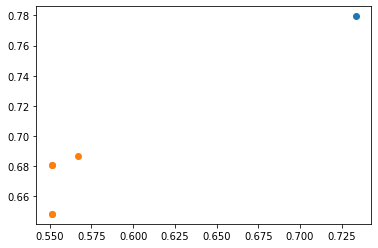

[array([[0.73362321, 0.77947472]]), array([[0.56683633, 0.68650176],
       [0.55117188, 0.6484375 ],
       [0.55117188, 0.68085938],
       [0.55117188, 0.6484375 ],
       [0.55117188, 0.68085938]])]


In [11]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X = np.array([[0.56683633, 0.68650176],
[0.6484375,  0.55117188],
[0.68085938, 0.55117188],
[0.77947472, 0.73362321],
[0.6484375,  0.55117188],
[0.68085938, 0.55117188]])

for x in X:
    if x[0] > x[1]:
        x[0], x[1] = x[1], x[0]
print(X)
model = DBSCAN(eps=0.1, min_samples=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
clusters_list = list()
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    c = np.concatenate((X[row_ix, 0], X[row_ix, 1]), axis=0)
    clusters_list.append(c.T)
    print(np.array(row_ix)[0])
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
print(clusters_list)

In [28]:
a = (np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) % 3) / 10
a

array([0.1, 0.2, 0. , 0.1, 0.2, 0. , 0.1, 0.2, 0. ])